In [3]:
#importar las librerias necesarioas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import math

In [7]:
#Cargando datasets
counts = pd.read_csv('/Users/Diego/Desktop/Aletia DA/Challenges Data Analysis/Challenge 5 Oython/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('/Users/Diego/Desktop/Aletia DA/Challenges Data Analysis/Challenge 5 Oython/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [11]:
#trafico diario de bicicletas
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]
daily

,Total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0
...,...
2022-04-26,4674.0
2022-04-27,5766.0
2022-04-28,5032.0


In [12]:
# Hint: Algunos días como los fines de semana incentivan el uso de bicicleta
# Solución: Creamos las primeras 7 variables las cuales serán un ID del día de la semana
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [13]:
# Hint: Los días libres son buenos para andar en bicicleta
# Solución: Crearemos también una variable para identificar los días festivos
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

C:\Users\Diego\AppData\Local\Temp\ipykernel_18048\383118149.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


(8.0, 17.0)

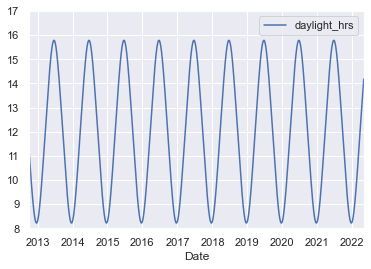

In [14]:
# Hint: Seattle es una ciudad donde el número de horas de luz en el día varían mucho durante el año
# Solución: Crearemos una variable que nos indique el número de horas de luz en el día
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [15]:
# Hint: El clima es importante cuando queremos salir a montar bicicleta
# Solución: Calculamos un promedio de temperatura por día 
# Agregamos una variable de probabilidad de lluvia
# Agregamos una variable para los días sin lluvia (es importante saber si habrá poca lluvia pero más importante saber si no habrá)

# Las temperaturas estan en 1/10 grados C; Convertimos los datos a grados C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
# La precipitación esta en 1/10 mm; Convertimos a pulgadas
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [16]:
# Hint: El calentamiento global modifica las temperaturas cada año
# Sol: Creamos una variable "contador" que nos ayuda a dar al modelo intuición sobre el año en curso
daily['annual'] = (daily.index - daily.index[0]).days / 365.

# Veamos el resultado
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,5.60,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,5.65,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,5.95,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,6.05,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,6.05,1.0,0.010959


In [17]:
daily.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3497 entries, 2012-10-03 to 2022-04-30
Freq: D
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total         3497 non-null   float64
 1   Mon           3497 non-null   float64
 2   Tue           3497 non-null   float64
 3   Wed           3497 non-null   float64
 4   Thu           3497 non-null   float64
 5   Fri           3497 non-null   float64
 6   Sat           3497 non-null   float64
 7   Sun           3497 non-null   float64
 8   holiday       3497 non-null   float64
 9   daylight_hrs  3497 non-null   float64
 10  PRCP          1551 non-null   float64
 11  Temp (C)      1551 non-null   float64
 12  dry day       1551 non-null   float64
 13  annual        3497 non-null   float64
dtypes: float64(14)
memory usage: 538.8 KB


In [19]:
# Borramos todos los valores nulos
dailyClean = daily.dropna()

In [20]:
dailyClean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1551 entries, 2012-10-03 to 2016-12-31
Freq: D
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total         1551 non-null   float64
 1   Mon           1551 non-null   float64
 2   Tue           1551 non-null   float64
 3   Wed           1551 non-null   float64
 4   Thu           1551 non-null   float64
 5   Fri           1551 non-null   float64
 6   Sat           1551 non-null   float64
 7   Sun           1551 non-null   float64
 8   holiday       1551 non-null   float64
 9   daylight_hrs  1551 non-null   float64
 10  PRCP          1551 non-null   float64
 11  Temp (C)      1551 non-null   float64
 12  dry day       1551 non-null   float64
 13  annual        1551 non-null   float64
dtypes: float64(14)
memory usage: 181.8 KB


In [21]:
# Importamos las bibliotecas
from sklearn.linear_model  import LinearRegression

In [22]:
x = np.array(dailyClean[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']])    # Variable Independiente Arreglos de np bidimensional(lleva dos corchtes)
y = np.array(dailyClean['Total'])

In [23]:
# Creando modelo de regresion lineal
ModeloLineal = LinearRegression()

# fit between variables 
ModeloLineal.fit(x,y)      # De la varible ModeloLineal, las machea con la función (fit) con las variables x,y

LinearRegression()

In [24]:
print(f" intercept:{ModeloLineal.intercept_}\n slope:{ModeloLineal.coef_}\n R^2: {ModeloLineal.score(x,y)}")

 intercept:-4469.063744542591
 slope:[ 1.96582060e+03  2.56607499e+03  2.52264646e+03  1.92005143e+03
  5.68961541e+02 -4.66657294e+03 -4.87698208e+03 -4.58067887e+03
  4.64390628e+02 -6.77201876e+05  2.05668909e+03  1.56299537e+03
  9.52976867e+01]
 R^2: 0.862806496015798


In [ ]:
# INTERPRETACION.- # La pendiente es negativa para el número de viajes en bicicleta sino hay días, y condiciones para usar la bicicleta.
# Cada valor "Slope" muestra la participación de los dias y condiciones para usar la bicicleta, como sigue:
# por columnas: 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual'
# El 86.28 % de los datos pueden explicar mi modelo, lo cual es bueno.

In [25]:
# Creando una nueva columna al dataframe "dailyClean" para que aplique los valores calculados para la variable X
dailyClean['predicted'] = ModeloLineal.predict(x)  
dailyClean

C:\Users\Diego\AppData\Local\Temp\ipykernel_18048\1436301343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyClean['predicted'] = ModeloLineal.predict(x)


,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,predicted
Date,,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000,5.60,1.0,0.000000,14100.145825
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000,5.65,1.0,0.002740,13548.925921
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000,5.95,1.0,0.005479,12640.012742
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000,6.05,1.0,0.008219,7534.113041
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000,6.05,1.0,0.010959,7297.100792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,4420.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.243449,0.000197,4.20,0.0,4.235616,8760.109183
2016-12-28,5888.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.252283,0.000000,4.25,1.0,4.238356,10989.190706
2016-12-29,4536.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.262456,0.000197,4.40,0.0,4.241096,8436.033493


In [26]:
def RSE(y_true,y_predicted):        # Definimos las variables que vamos a usar en la funciòn
                                   
    y_true = np.array(y_true)            # Convertimos los arreglos en numpy
    y_predicted = np.array(y_predicted)  # Convertimos los arreglos en numpy
    RSS = np.sum(np.square(y_true - y_predicted))  # Aplicamos la formula que necesitamos calcular

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

In [27]:
yy =  ModeloLineal.predict(x)     #Es la columna prediced

In [28]:
print(f"RSE: {RSE(y,yy)}") # Resultado del error residual estandar

RSE: 1889.3146439576972


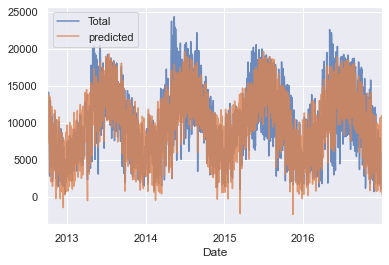

In [29]:
dailyClean[['Total', 'predicted']].plot(alpha=0.8);